In [54]:
import pandas as pd
import numpy as np
import random

The purpose of this code is to create a model that will correctly predict whether or not a car in an aution will be a worthwhile purchase or not. The original kaggle challenge can be found at https://www.kaggle.com/c/DontGetKicked/overview. This python file only contains the modeling I did on the data. You will find in the R file the work I did to extract features I thought would be important in a final model.

## Reading in given training data

In [55]:
train = pd.read_csv("pytrain.csv")

In [56]:
train.head()

,RefId,IsBadBuy_no,IsBadBuy_yes,VehYear,PurchDate,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,generalMake_AMERICAN,generalMake_CHEVROLET,...,Transmission_AUTO,Transmission_MANUAL,VehOdo,VehBCost,MMRAcqAucAvg,MMRAcqRetAvg,MMRCurrAucAvg,MMRCurrRetAvg,WarrantyCost,BYRNO
0,1,0,1,2006,2009,1,0,0,0,0,...,1,0,89046,7100.0,8155,11636,7451,11597,1113,21973
1,2,0,1,2004,2009,1,0,0,0,0,...,1,0,93593,7600.0,6854,10897,7456,11374,1053,19638
2,3,0,1,2005,2009,1,0,0,0,0,...,1,0,73807,4900.0,3202,6943,4035,7146,1389,19638
3,4,0,1,2004,2009,1,0,0,0,0,...,1,0,65617,4100.0,1893,4658,1844,4375,630,19638
4,5,0,1,2005,2009,1,0,0,0,0,...,0,1,69367,4000.0,3913,7723,3247,6739,1020,19638


In [57]:
train = train.drop(["IsBadBuy_yes", "generalMake_NULL"], axis=1)

## reading in test data set (used for submission)

In [58]:
test = pd.read_csv("pytest.csv")

In [59]:
test.head()

,RefId,VehYear,PurchDate,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,generalMake_AMERICAN,generalMake_CHEVROLET,generalMake_CHRYSLER,generalMake_DODGE,...,Transmission_AUTO,Transmission_MANUAL,VehOdo,VehBCost,MMRAcqAucAvg,MMRAcqRetAvg,MMRCurrAucAvg,MMRCurrRetAvg,WarrantyCost,BYRNO
0,73015,2005,2009,1,0,0,0,0,0,0,...,1,0,85377,6500.0,5032,5935,4905,8557,2152,18881
1,73016,2005,2009,1,0,0,0,1,0,0,...,1,0,61873,6300.0,4502,5362,4645,7562,1118,18111
2,73017,2006,2009,1,0,0,0,0,0,1,...,1,0,69283,9700.0,10244,11564,10883,15340,1215,18111
3,73018,2002,2009,1,0,0,0,0,0,0,...,1,0,87889,4150.0,2558,3263,2928,5725,1933,18881
4,73019,2007,2009,1,0,0,0,0,0,0,...,1,0,73432,4100.0,5013,5914,5013,5914,920,18111


In [60]:
train["IsBadBuy_no"].value_counts()

0    64007
1     8976
Name: IsBadBuy_no, dtype: int64

In [61]:
random.seed(101)
X = train.drop(["IsBadBuy_no","RefId"], axis=1)
y = train["IsBadBuy_no"]

## Creating Train and Test set, Instantiating Model

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [64]:
from sklearn.ensemble import RandomForestClassifier
trees = RandomForestClassifier(min_samples_leaf=20)
trees.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=20)

In [65]:
predictions = trees.predict(X_test)

In [66]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

While my correctly classified good cars is really low, I know that the competition is using a loss function that grades the probability of being predicted a bad car for each ID rather than correctly put it in the right class. Using a size of 20 was the first size that correctly predicted some of the cars to be a purchase. I tried some other leaf parameters, but found 20 to be my best one for submission.

In [68]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     19211
           1       1.00      0.00      0.00      2684

    accuracy                           0.88     21895
   macro avg       0.94      0.50      0.47     21895
weighted avg       0.89      0.88      0.82     21895

[[19211     0]
 [ 2680     4]]


In [69]:
trees.feature_importances_

array([8.47875282e-02, 1.49329959e-02, 1.06282663e-02, 1.34616302e-02,
       7.45889001e-03, 1.76376449e-03, 9.50527534e-03, 6.29436408e-03,
       6.07496352e-03, 1.07328361e-02, 1.41873266e-03, 2.16996597e-03,
       1.42468889e-03, 2.81242763e-03, 3.12151407e-05, 2.79456976e-03,
       2.37691837e-03, 1.61623336e-03, 8.32227591e-04, 2.09350856e-03,
       2.53273159e-03, 1.03115089e-01, 1.18687758e-01, 1.23948917e-01,
       9.91203200e-02, 1.18831332e-01, 1.04484206e-01, 7.38702040e-02,
       7.21984402e-02])

In [72]:
len(train.columns)

31

In [73]:
#Some ending EDA where we find that the vehicle year is the most important features in determining if a car will be a good
#buy is VehBCost, MMRCurrAucAvg, and MMRAcqAucAvg
importantfeatures = pd.DataFrame({"Features":X.columns,"Importance":trees.feature_importances_})
importantfeatures

,Features,Importance
0,VehYear,0.084788
1,PurchDate,0.014933
2,Auction_ADESA,0.010628
3,Auction_MANHEIM,0.013462
4,Auction_OTHER,0.007459
5,generalMake_AMERICAN,0.001764
6,generalMake_CHEVROLET,0.009505
7,generalMake_CHRYSLER,0.006294
8,generalMake_DODGE,0.006075
9,generalMake_FORD,0.010733


## Making test predictions

In [74]:
testpreds = trees.predict_proba(test.drop("RefId", axis=1))

In [75]:
testpreds[:,0]

array([0.90075489, 0.90724796, 0.92682533, ..., 0.89602348, 0.8531159 ,
       0.77138744])

In [76]:
output = pd.DataFrame({"RefId": test.RefId, "IsBadBuy":testpreds[:,1]})

In [77]:
output.head()

,RefId,IsBadBuy
0,73015,0.099245
1,73016,0.092752
2,73017,0.073175
3,73018,0.280980
4,73019,0.229635


In [78]:
output.to_csv("pysubmission.csv",index=False)

This was the model that gave me the best results in the kaggle competition. The random forest classifier outperformed both my Adaboost model and my Neural Network, which are included below.

## Testing out different Models

In [79]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(learning_rate=.1)
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1)

In [80]:
testpreds = ada.predict_proba(test.drop("RefId", axis=1))

In [81]:
testpreds

array([[0.59263502, 0.40736498],
       [0.59577437, 0.40422563],
       [0.61586983, 0.38413017],
       ...,
       [0.60893215, 0.39106785],
       [0.59674858, 0.40325142],
       [0.57926244, 0.42073756]])

In [82]:
output2 = pd.DataFrame({"RefId": test.RefId, "IsBadBuy":testpreds[:,1]})

In [83]:
output2.to_csv("pysubmission2.csv",index=False)

## Building Neural Network

In [84]:
oldX_train = X_train.copy()
oldX_test = X_test.copy()

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [87]:
model = Sequential()
model.add(Dense(units=28,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [89]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          )

Epoch 1/600
1597/1597 [==============================] - 2s 1ms/step - loss: 0.4021 - accuracy: 0.8746 - val_loss: 0.3592 - val_accuracy: 0.8774
Epoch 2/600
1597/1597 [==============================] - 1s 935us/step - loss: 0.3728 - accuracy: 0.8768 - val_loss: 0.3588 - val_accuracy: 0.8774
Epoch 3/600
1597/1597 [==============================] - 1s 926us/step - loss: 0.3666 - accuracy: 0.8768 - val_loss: 0.3578 - val_accuracy: 0.8774
Epoch 4/600
1597/1597 [==============================] - 1s 911us/step - loss: 0.3644 - accuracy: 0.8768 - val_loss: 0.3562 - val_accuracy: 0.8774
Epoch 5/600
1597/1597 [==============================] - 1s 920us/step - loss: 0.3626 - accuracy: 0.8768 - val_loss: 0.3569 - val_accuracy: 0.8774
Epoch 6/600
1597/1597 [==============================] - 1s 934us/step - loss: 0.3610 - accuracy: 0.8768 - val_loss: 0.3554 - val_accuracy: 0.8774
Epoch 7/600
1597/1597 [==============================] - 2s 949us/step - loss: 0.3592 - accuracy: 0.8768 - val_loss: 0.3

1597/1597 [==============================] - 1s 918us/step - loss: 0.3556 - accuracy: 0.8768 - val_loss: 0.3535 - val_accuracy: 0.8774
Epoch 57/600
1597/1597 [==============================] - 1s 906us/step - loss: 0.3558 - accuracy: 0.8767 - val_loss: 0.3540 - val_accuracy: 0.8774
Epoch 58/600
1597/1597 [==============================] - 1s 912us/step - loss: 0.3549 - accuracy: 0.8767 - val_loss: 0.3534 - val_accuracy: 0.8774
Epoch 59/600
1597/1597 [==============================] - 1s 914us/step - loss: 0.3552 - accuracy: 0.8766 - val_loss: 0.3545 - val_accuracy: 0.8774
Epoch 60/600
1597/1597 [==============================] - 1s 908us/step - loss: 0.3552 - accuracy: 0.8764 - val_loss: 0.3542 - val_accuracy: 0.8774
Epoch 61/600
1597/1597 [==============================] - 1s 909us/step - loss: 0.3551 - accuracy: 0.8766 - val_loss: 0.3536 - val_accuracy: 0.8774
Epoch 62/600
1597/1597 [==============================] - 1s 893us/step - loss: 0.3549 - accuracy: 0.8768 - val_loss: 0.3540 

1597/1597 [==============================] - 1s 903us/step - loss: 0.3537 - accuracy: 0.8767 - val_loss: 0.3532 - val_accuracy: 0.8774
Epoch 112/600
1597/1597 [==============================] - 2s 956us/step - loss: 0.3538 - accuracy: 0.8767 - val_loss: 0.3532 - val_accuracy: 0.8774
Epoch 113/600
1597/1597 [==============================] - 2s 945us/step - loss: 0.3545 - accuracy: 0.8766 - val_loss: 0.3534 - val_accuracy: 0.8774
Epoch 114/600
1597/1597 [==============================] - 2s 971us/step - loss: 0.3541 - accuracy: 0.8768 - val_loss: 0.3529 - val_accuracy: 0.8774
Epoch 115/600
1597/1597 [==============================] - 2s 990us/step - loss: 0.3541 - accuracy: 0.8767 - val_loss: 0.3533 - val_accuracy: 0.8774
Epoch 116/600
1597/1597 [==============================] - 2s 979us/step - loss: 0.3538 - accuracy: 0.8766 - val_loss: 0.3529 - val_accuracy: 0.8774
Epoch 117/600
1597/1597 [==============================] - 2s 1ms/step - loss: 0.3537 - accuracy: 0.8766 - val_loss: 0.3

1597/1597 [==============================] - 1s 888us/step - loss: 0.3536 - accuracy: 0.8768 - val_loss: 0.3528 - val_accuracy: 0.8774
Epoch 167/600
1597/1597 [==============================] - 1s 886us/step - loss: 0.3530 - accuracy: 0.8767 - val_loss: 0.3531 - val_accuracy: 0.8774
Epoch 168/600
1597/1597 [==============================] - 1s 899us/step - loss: 0.3533 - accuracy: 0.8766 - val_loss: 0.3525 - val_accuracy: 0.8774
Epoch 169/600
1597/1597 [==============================] - 1s 896us/step - loss: 0.3533 - accuracy: 0.8767 - val_loss: 0.3531 - val_accuracy: 0.8774
Epoch 170/600
1597/1597 [==============================] - 1s 885us/step - loss: 0.3531 - accuracy: 0.8767 - val_loss: 0.3529 - val_accuracy: 0.8774
Epoch 171/600
1597/1597 [==============================] - 1s 884us/step - loss: 0.3538 - accuracy: 0.8766 - val_loss: 0.3533 - val_accuracy: 0.8774
Epoch 172/600
1597/1597 [==============================] - 1s 892us/step - loss: 0.3532 - accuracy: 0.8766 - val_loss: 0

1597/1597 [==============================] - 1s 921us/step - loss: 0.3538 - accuracy: 0.8767 - val_loss: 0.3512 - val_accuracy: 0.8774
Epoch 222/600
1597/1597 [==============================] - 1s 916us/step - loss: 0.3524 - accuracy: 0.8767 - val_loss: 0.3520 - val_accuracy: 0.8775
Epoch 223/600
1597/1597 [==============================] - 1s 893us/step - loss: 0.3525 - accuracy: 0.8766 - val_loss: 0.3513 - val_accuracy: 0.8774
Epoch 224/600
1597/1597 [==============================] - 1s 898us/step - loss: 0.3532 - accuracy: 0.8766 - val_loss: 0.3524 - val_accuracy: 0.8774
Epoch 225/600
1597/1597 [==============================] - 1s 899us/step - loss: 0.3529 - accuracy: 0.8767 - val_loss: 0.3521 - val_accuracy: 0.8775
Epoch 226/600
1597/1597 [==============================] - 1s 889us/step - loss: 0.3520 - accuracy: 0.8766 - val_loss: 0.3527 - val_accuracy: 0.8775
Epoch 227/600
1597/1597 [==============================] - 1s 901us/step - loss: 0.3524 - accuracy: 0.8767 - val_loss: 0

1597/1597 [==============================] - 1s 888us/step - loss: 0.3517 - accuracy: 0.8767 - val_loss: 0.3519 - val_accuracy: 0.8775
Epoch 277/600
1597/1597 [==============================] - 1s 884us/step - loss: 0.3520 - accuracy: 0.8767 - val_loss: 0.3520 - val_accuracy: 0.8775
Epoch 278/600
1597/1597 [==============================] - 1s 888us/step - loss: 0.3517 - accuracy: 0.8768 - val_loss: 0.3535 - val_accuracy: 0.8775
Epoch 279/600
1597/1597 [==============================] - 1s 885us/step - loss: 0.3513 - accuracy: 0.8767 - val_loss: 0.3519 - val_accuracy: 0.8775
Epoch 280/600
1597/1597 [==============================] - 1s 891us/step - loss: 0.3522 - accuracy: 0.8767 - val_loss: 0.3520 - val_accuracy: 0.8775
Epoch 281/600
1597/1597 [==============================] - 1s 890us/step - loss: 0.3518 - accuracy: 0.8766 - val_loss: 0.3518 - val_accuracy: 0.8775
Epoch 282/600
1597/1597 [==============================] - 1s 894us/step - loss: 0.3523 - accuracy: 0.8769 - val_loss: 0

1597/1597 [==============================] - 1s 890us/step - loss: 0.3512 - accuracy: 0.8768 - val_loss: 0.3520 - val_accuracy: 0.8775
Epoch 332/600
1597/1597 [==============================] - 1s 894us/step - loss: 0.3512 - accuracy: 0.8764 - val_loss: 0.3530 - val_accuracy: 0.8775
Epoch 333/600
1597/1597 [==============================] - 1s 892us/step - loss: 0.3514 - accuracy: 0.8766 - val_loss: 0.3512 - val_accuracy: 0.8775
Epoch 334/600
1597/1597 [==============================] - 1s 895us/step - loss: 0.3514 - accuracy: 0.8766 - val_loss: 0.3512 - val_accuracy: 0.8775
Epoch 335/600
1597/1597 [==============================] - 1s 887us/step - loss: 0.3516 - accuracy: 0.8769 - val_loss: 0.3517 - val_accuracy: 0.8775
Epoch 336/600
1597/1597 [==============================] - 1s 888us/step - loss: 0.3513 - accuracy: 0.8768 - val_loss: 0.3510 - val_accuracy: 0.8775
Epoch 337/600
1597/1597 [==============================] - 1s 887us/step - loss: 0.3518 - accuracy: 0.8766 - val_loss: 0

1597/1597 [==============================] - 1s 885us/step - loss: 0.3506 - accuracy: 0.8766 - val_loss: 0.3520 - val_accuracy: 0.8775
Epoch 387/600
1597/1597 [==============================] - 1s 888us/step - loss: 0.3515 - accuracy: 0.8765 - val_loss: 0.3522 - val_accuracy: 0.8775
Epoch 388/600
1597/1597 [==============================] - 1s 916us/step - loss: 0.3508 - accuracy: 0.8766 - val_loss: 0.3522 - val_accuracy: 0.8775
Epoch 389/600
1597/1597 [==============================] - 1s 910us/step - loss: 0.3511 - accuracy: 0.8768 - val_loss: 0.3525 - val_accuracy: 0.8775
Epoch 390/600
1597/1597 [==============================] - 1s 903us/step - loss: 0.3520 - accuracy: 0.8768 - val_loss: 0.3520 - val_accuracy: 0.8775
Epoch 391/600
1597/1597 [==============================] - 1s 903us/step - loss: 0.3514 - accuracy: 0.8768 - val_loss: 0.3518 - val_accuracy: 0.8775
Epoch 392/600
1597/1597 [==============================] - 1s 917us/step - loss: 0.3513 - accuracy: 0.8764 - val_loss: 0

1597/1597 [==============================] - 2s 946us/step - loss: 0.3510 - accuracy: 0.8768 - val_loss: 0.3522 - val_accuracy: 0.8775
Epoch 442/600
1597/1597 [==============================] - 2s 942us/step - loss: 0.3506 - accuracy: 0.8768 - val_loss: 0.3524 - val_accuracy: 0.8775
Epoch 443/600
1597/1597 [==============================] - 2s 945us/step - loss: 0.3516 - accuracy: 0.8767 - val_loss: 0.3522 - val_accuracy: 0.8775
Epoch 444/600
1597/1597 [==============================] - 1s 939us/step - loss: 0.3515 - accuracy: 0.8767 - val_loss: 0.3523 - val_accuracy: 0.8775
Epoch 445/600
1597/1597 [==============================] - 1s 939us/step - loss: 0.3506 - accuracy: 0.8769 - val_loss: 0.3521 - val_accuracy: 0.8775
Epoch 446/600
1597/1597 [==============================] - 2s 962us/step - loss: 0.3515 - accuracy: 0.8764 - val_loss: 0.3523 - val_accuracy: 0.8775
Epoch 447/600
1597/1597 [==============================] - 2s 944us/step - loss: 0.3512 - accuracy: 0.8769 - val_loss: 0

1597/1597 [==============================] - 2s 996us/step - loss: 0.3509 - accuracy: 0.8769 - val_loss: 0.3522 - val_accuracy: 0.8775
Epoch 497/600
1597/1597 [==============================] - 2s 987us/step - loss: 0.3506 - accuracy: 0.8765 - val_loss: 0.3524 - val_accuracy: 0.8775
Epoch 498/600
1597/1597 [==============================] - 2s 955us/step - loss: 0.3509 - accuracy: 0.8767 - val_loss: 0.3530 - val_accuracy: 0.8775
Epoch 499/600
1597/1597 [==============================] - 2s 1ms/step - loss: 0.3502 - accuracy: 0.8767 - val_loss: 0.3526 - val_accuracy: 0.8775
Epoch 500/600
1597/1597 [==============================] - 2s 1ms/step - loss: 0.3506 - accuracy: 0.8768 - val_loss: 0.3527 - val_accuracy: 0.8775
Epoch 501/600
1597/1597 [==============================] - 2s 1ms/step - loss: 0.3512 - accuracy: 0.8766 - val_loss: 0.3525 - val_accuracy: 0.8775
Epoch 502/600
1597/1597 [==============================] - 2s 952us/step - loss: 0.3512 - accuracy: 0.8767 - val_loss: 0.3518 

1597/1597 [==============================] - 2s 942us/step - loss: 0.3512 - accuracy: 0.8766 - val_loss: 0.3528 - val_accuracy: 0.8775
Epoch 552/600
1597/1597 [==============================] - 2s 975us/step - loss: 0.3497 - accuracy: 0.8768 - val_loss: 0.3523 - val_accuracy: 0.8775
Epoch 553/600
1597/1597 [==============================] - 2s 961us/step - loss: 0.3511 - accuracy: 0.8767 - val_loss: 0.3522 - val_accuracy: 0.8775
Epoch 554/600
1597/1597 [==============================] - 1s 936us/step - loss: 0.3503 - accuracy: 0.8766 - val_loss: 0.3526 - val_accuracy: 0.8775
Epoch 555/600
1597/1597 [==============================] - 2s 961us/step - loss: 0.3508 - accuracy: 0.8768 - val_loss: 0.3526 - val_accuracy: 0.8775
Epoch 556/600
1597/1597 [==============================] - 1s 939us/step - loss: 0.3508 - accuracy: 0.8767 - val_loss: 0.3529 - val_accuracy: 0.8775
Epoch 557/600
1597/1597 [==============================] - 2s 979us/step - loss: 0.3514 - accuracy: 0.8769 - val_loss: 0

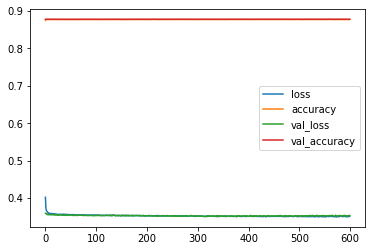

In [90]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [91]:
preds = model.predict(test.drop("RefId", axis=1))

In [92]:
preds

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [93]:
preds = np.abs(1-preds)

In [94]:
preds

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [95]:
preds[:,0]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [96]:
output3 = pd.DataFrame({"RefId": test.RefId, "IsBadBuy":preds[:,0]})

In [97]:
output3.head()

,RefId,IsBadBuy
0,73015,1.0
1,73016,1.0
2,73017,1.0
3,73018,1.0
4,73019,1.0


In [98]:
output3.to_csv("pysubmission3.csv",index=False)